In [1]:
%pylab inline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
from matplotlib import pyplot
import pandas as pd

In [9]:
data = pd.read_csv('cbg_patterns.csv')

In [6]:
data.head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


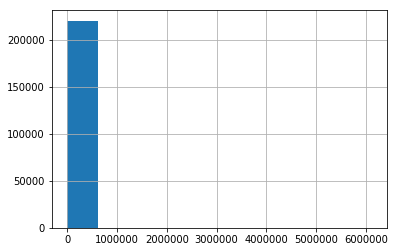

In [5]:
data['raw_visitor_count'].hist()

# 首先是raw_visit_count的qq图

先看一下标准的正态分布

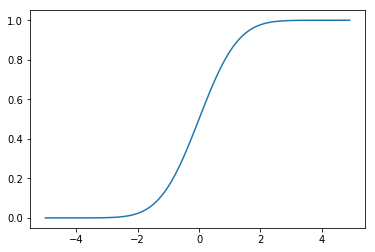

In [7]:
from scipy import stats
x = np.arange(-5, 5, 0.1)
y = stats.norm.cdf(x, 0, 1)
plt.plot(x, y)

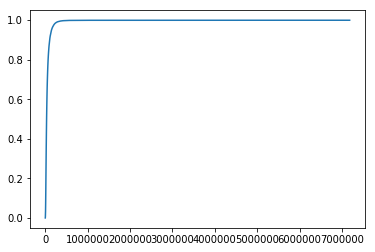

In [10]:
raw_visit_count = data['raw_visit_count']
sorted_ = np.sort(raw_visit_count)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

直观上来看并不符合正态分布，我们看一下qq图

In [11]:
raw_visit_count.describe()

count    2.206290e+05
mean     4.793066e+04
std      6.252655e+04
min      6.000000e+01
25%      1.704200e+04
50%      3.064000e+04
75%      5.667800e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64

首先我们把异常值null全部删除

In [12]:
raw_visit_count_ = raw_visit_count.dropna()

然后绘制price的qq图

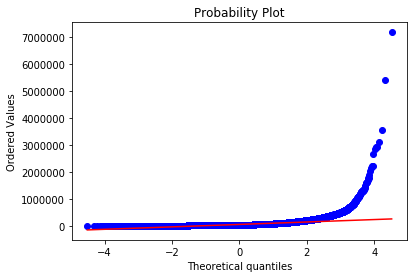

In [13]:
stats.probplot(raw_visit_count_, dist="norm", plot=plt)
plt.show()

可以看到price价格并不符合一个正态分布

# 然后是raw_visitor_count的qq图

In [14]:
raw_visitor_count = data['raw_visitor_count']
raw_visitor_count.describe()

count    2.206290e+05
mean     1.182032e+04
std      3.045832e+04
min      5.000000e+01
25%      3.430000e+03
50%      6.541000e+03
75%      1.309900e+04
max      6.113949e+06
Name: raw_visitor_count, dtype: float64

In [16]:
raw_visitor_count.isnull().sum()

106

In [40]:
raw_visit_count = data['raw_visit_count']
raw_visit_count.isnull().sum()

106

可见数值属性raw_visitor_count属性也是存在空值的

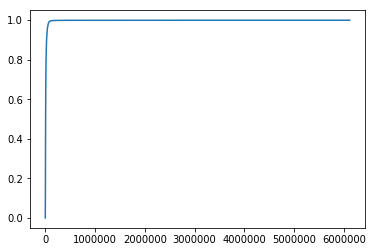

In [17]:
sorted_ = np.sort(raw_visitor_count)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

raw_visitor_count看起来几乎也不是正态分布

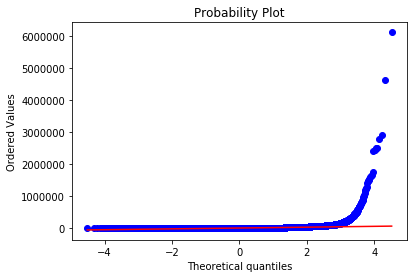

In [19]:
stats.probplot(raw_visitor_count.dropna(), dist="norm", plot=plt)
plt.show()

# 看起来vraw_visitor_count也并不符合正太分布

# 2.数据缺失的处理

In [24]:
# 首先查看raw_visit_count中的缺失数据
data[raw_visit_count.isnull().values==True].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220629,2.605399e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220630,6.912099e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220631,7.205799e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220632,2.060000e+10,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220633,3.600394e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}


从数据缺失中我们看到几乎所有的raw_visit_count缺失时，raw_visitor_count数据同样会缺失。这部分缺失的原因可能是未采集到样本。

下面对缺失部分使用不同的策略进行处理：

我们引入sklearn库来实现插值策略

In [31]:
from sklearn.preprocessing import Imputer
import statsmodels.formula.api as smf
X = data.iloc[:, 3:5].values
X

array([[75122., 18314.],
       [95649., 38942.],
       [14009.,  3039.],
       ...,
       [   nan,    nan],
       [   nan,    nan],
       [   nan,    nan]])

## 1. 删除缺失数据

In [33]:
# 首先是删除缺失数据
drop = data['raw_visitor_count'].dropna()
drop.isnull().sum()

0

In [34]:
# 首先是删除缺失数据
drop = raw_visitor_count.dropna()
# 用最高频率值来填补缺失值
imr = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0 )
imr = imr.fit(X)
most = imr.transform(X)
most[:,-1]

array([18314., 38942.,  3039., ...,  2292.,  2292.,  2292.])

In [36]:
most[:,0]

array([75122., 95649., 14009., ..., 24531., 24531., 24531.])

## 2. 用最高频率值来填补缺失值

In [37]:
from pandas import DataFrame,Series
most_visitor = Series(most[:,-1])
most_visit = Series(most[:,-1])

## 3. 通过属性的相关关系来填补缺失值(通过列之间的相关关系）


In [38]:
raw_visitor_count = data['raw_visitor_count']
raw_visit_count = data['raw_visit_count']

In [39]:
# 首先判断一下相关性，价格应该和红酒的得分成正相关的，我们从相关系数来看一下
raw_visit_count.corr(raw_visitor_count)

0.8158504431252985

可见raw_visitor_count和raw_visit_count之间为高度相关，但是由于我们观察数据发现raw_visit_count和raw_visitor_count是同时缺失的，因为小组没有去相应的CBG做记录也就不会有相应的记录人数，所以通过属性的相关关系来填补缺失值这一方法是不成立的。

## 4. 通过数据对象之间的相似性来填补缺失值
**通过数据对象之间的相似性来填补缺失值，即通过观察行之间的相似性。但是根据相应的社区之间的关系去估计社区人数也是不科学的。所以我认为这个方法也行不通。所以针对这个数据集最好的处理异常数据的方法就是删除。**

# 下面是处理后的数据和原数据的统计对比

## 1. 删除缺失数据的QQ图

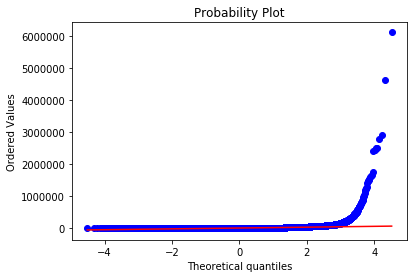

In [42]:
stats.probplot(drop, dist="norm", plot=plt)
plt.show()